In [14]:

import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
tf.__version__
import matplotlib.pyplot as plt

In [2]:
function = lambda w: w ** 2 - 4 * w
derivative = lambda w: 2 * w - 4

In [39]:

w = np.arange(-10, 14, 0.1)
loss = function(w)
w_0 = -8

tangent_line = lambda w: derivative(w_0) * (w - w_0) + function(w_0)
tangent_line_values = tangent_line(w)

In [40]:

df = pd.DataFrame({'w': w, 'loss': loss,'tangent_line': tangent_line_values})
df.head()

,w,loss,tangent_line
0,-10.0,140.00,136.0
1,-9.9,137.61,134.0
2,-9.8,135.24,132.0
3,-9.7,132.89,130.0
4,-9.6,130.56,128.0


In [41]:
fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function'),
                      go.Scatter(x=df['w'][:100], y=df['tangent_line'][:100], name='tangent line'),
                      go.Scatter(x=[w_0], y=[function(w_0)], marker_size=10, name='point')],
                layout=go.Layout(width=800, title='Loss Function'))
fig.show()

In [6]:

max_iters = 10000
iters = 0
w_0 = -1
previous_step_size = 1
learning_rate = 0.01
precision = 0.000001
derivative = lambda w: 2 * w - 4
points = []

while previous_step_size > precision and iters < max_iters:
    w_prev = w_0
    w_0 = w_0 - learning_rate * derivative(w_prev)
    previous_step_size = abs(w_0 - w_prev)
    iters += 1
    points.append(w_0)
    print(f'Iteracja # {iters}: obecny punkt: {w_0}')

print(f'Minimum lokalne w punkcie: {w_0}')

Iteracja # 1: obecny punkt: -0.94
Iteracja # 2: obecny punkt: -0.8812
Iteracja # 3: obecny punkt: -0.823576
Iteracja # 4: obecny punkt: -0.76710448
Iteracja # 5: obecny punkt: -0.7117623904
Iteracja # 6: obecny punkt: -0.657527142592
Iteracja # 7: obecny punkt: -0.60437659974016
Iteracja # 8: obecny punkt: -0.5522890677453568
Iteracja # 9: obecny punkt: -0.5012432863904497
Iteracja # 10: obecny punkt: -0.4512184206626407
Iteracja # 11: obecny punkt: -0.40219405224938787
Iteracja # 12: obecny punkt: -0.3541501712044001
Iteracja # 13: obecny punkt: -0.3070671677803121
Iteracja # 14: obecny punkt: -0.26092582442470585
Iteracja # 15: obecny punkt: -0.21570730793621173
Iteracja # 16: obecny punkt: -0.1713931617774875
Iteracja # 17: obecny punkt: -0.12796529854193775
Iteracja # 18: obecny punkt: -0.08540599257109899
Iteracja # 19: obecny punkt: -0.04369787271967701
Iteracja # 20: obecny punkt: -0.002823915265283472
Iteracja # 21: obecny punkt: 0.0372325630400222
Iteracja # 22: obecny punkt: 

In [7]:

def gradient_descent(derivative_func, learning_rate=0.01, max_iters=10000,
                     precision=0.000001, w_0=-8, verbose=True):
    iters = 0
    previous_step_size = 1
    points = []

    while previous_step_size > precision and iters < max_iters:
        w_prev = w_0
        w_0 = w_0 - learning_rate * derivative_func(w_prev)
        previous_step_size = abs(w_0 - w_prev)
        iters += 1
        points.append(w_0)
        if verbose:
            print(f'Iteracja # {iters}: obecny punkt: {w_0}')


    print(f'Minimum lokalne w punkcie: {w_0}')
    return points

points = gradient_descent(derivative)


Iteracja # 1: obecny punkt: -7.8
Iteracja # 2: obecny punkt: -7.604
Iteracja # 3: obecny punkt: -7.41192
Iteracja # 4: obecny punkt: -7.2236816
Iteracja # 5: obecny punkt: -7.039207968
Iteracja # 6: obecny punkt: -6.8584238086400005
Iteracja # 7: obecny punkt: -6.681255332467201
Iteracja # 8: obecny punkt: -6.507630225817857
Iteracja # 9: obecny punkt: -6.3374776213015
Iteracja # 10: obecny punkt: -6.17072806887547
Iteracja # 11: obecny punkt: -6.007313507497961
Iteracja # 12: obecny punkt: -5.8471672373480015
Iteracja # 13: obecny punkt: -5.6902238926010416
Iteracja # 14: obecny punkt: -5.53641941474902
Iteracja # 15: obecny punkt: -5.38569102645404
Iteracja # 16: obecny punkt: -5.23797720592496
Iteracja # 17: obecny punkt: -5.09321766180646
Iteracja # 18: obecny punkt: -4.951353308570331
Iteracja # 19: obecny punkt: -4.812326242398925
Iteracja # 20: obecny punkt: -4.676079717550946
Iteracja # 21: obecny punkt: -4.542558123199927
Iteracja # 22: obecny punkt: -4.411706960735929
Iteracj

In [8]:

points = pd.DataFrame({'point': points})
# points = points.reset_index()
points['value'] = function(points['point'])
points.head()

,point,value
0,-7.800000,92.040000
1,-7.604000,88.236816
2,-7.411920,84.584238
3,-7.223682,81.076302
4,-7.039208,77.707281


In [9]:
fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function'),
                      go.Scatter(x=points['point'], y=points['value'], marker_size=5, name='point', mode='markers')],
                layout=go.Layout(width=1000, title='Loss Function'))
fig.show()

In [10]:

def test_lr(func, derivative_func, learning_rate, w_0=-8):
    points = gradient_descent(derivative_func, learning_rate=learning_rate, w_0=w_0, verbose=False)
    points = pd.DataFrame({'point': points})
    points = points.reset_index()
    points['value'] = func(points['point'])

    fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function'),
                      go.Scatter(x=points['point'], y=points['value'], marker_size=5, name='point', mode='markers+lines')],
                layout=go.Layout(width=1000, title=f'Loss Function learning_rate:{learning_rate}'))
    fig.show()

test_lr(function, derivative, 0.01)

Minimum lokalne w punkcie: 1.9999518050127572


In [48]:
funkc = lambda x:x**2 - 4*x

In [72]:
values = np.arange(-1,5, 0.2)

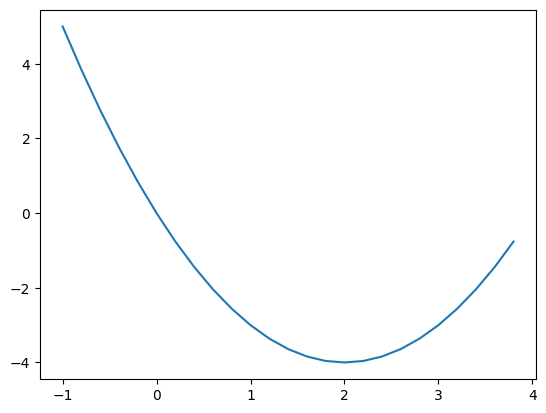

In [54]:
plt.plot(values, funkc(values))

In [55]:
poch = lambda x:x*2 -4

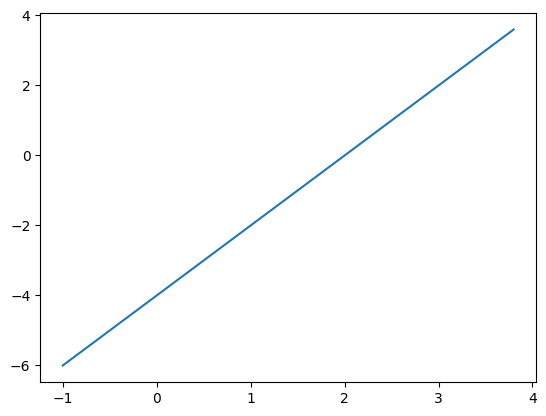

In [56]:
plt.plot(values, poch(values))

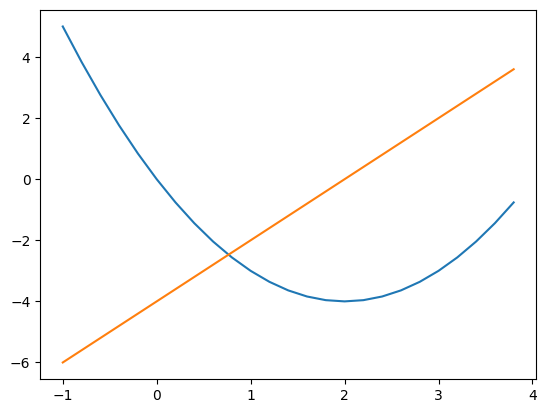

In [57]:
plt.plot(values, funkc(values))
plt.plot(values, poch(values))

In [75]:
w_0 = 1

linia = lambda w: poch(w_0) * (w - w_0) + funkc(w_0)

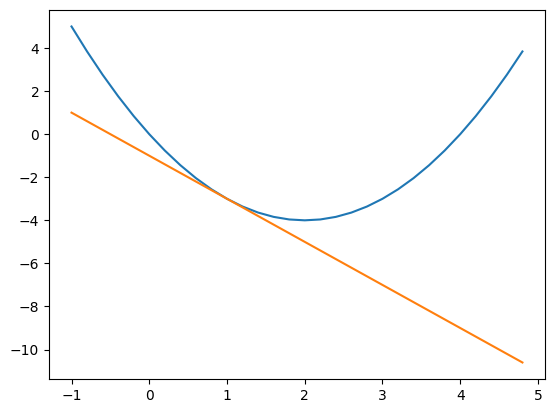

In [76]:
plt.plot(values, funkc(values))
plt.plot(values, linia(values))

ValueError: If using all scalar values, you must pass an index

In [78]:

def gradient_descent(derivative_func, learning_rate=0.01, max_iters=10000,
                     precision=0.000001, w_0=-8, verbose=True):
    iters = 0
    previous_step_size = 1
    points = []

    while previous_step_size > precision and iters < max_iters:
        w_prev = w_0
        w_0 = w_0 - learning_rate * derivative_func(w_prev)
        previous_step_size = abs(w_0 - w_prev)
        iters += 1
        points.append(w_0)
        if verbose:
            print(f'Iteracja # {iters}: obecny punkt: {w_0}')


    print(f'Minimum lokalne w punkcie: {w_0}')
    return points

points = gradient_descent(derivative)

Iteracja # 1: obecny punkt: -7.8
Iteracja # 2: obecny punkt: -7.604
Iteracja # 3: obecny punkt: -7.41192
Iteracja # 4: obecny punkt: -7.2236816
Iteracja # 5: obecny punkt: -7.039207968
Iteracja # 6: obecny punkt: -6.8584238086400005
Iteracja # 7: obecny punkt: -6.681255332467201
Iteracja # 8: obecny punkt: -6.507630225817857
Iteracja # 9: obecny punkt: -6.3374776213015
Iteracja # 10: obecny punkt: -6.17072806887547
Iteracja # 11: obecny punkt: -6.007313507497961
Iteracja # 12: obecny punkt: -5.8471672373480015
Iteracja # 13: obecny punkt: -5.6902238926010416
Iteracja # 14: obecny punkt: -5.53641941474902
Iteracja # 15: obecny punkt: -5.38569102645404
Iteracja # 16: obecny punkt: -5.23797720592496
Iteracja # 17: obecny punkt: -5.09321766180646
Iteracja # 18: obecny punkt: -4.951353308570331
Iteracja # 19: obecny punkt: -4.812326242398925
Iteracja # 20: obecny punkt: -4.676079717550946
Iteracja # 21: obecny punkt: -4.542558123199927
Iteracja # 22: obecny punkt: -4.411706960735929
Iteracj

In [79]:
points = pd.DataFrame({'point': points})
# points = points.reset_index()
points['value'] = function(points['point'])
points.head()

,point,value
0,-7.800000,92.040000
1,-7.604000,88.236816
2,-7.411920,84.584238
3,-7.223682,81.076302
4,-7.039208,77.707281


In [80]:
function_2 = lambda w: (w + 8) * (w - 5) * (w - 10) * (w + 5) * (w + 5) * (w - 2)

from sympy import Symbol, lambdify

w = Symbol('w')
f = (w + 8) * (w - 5) * (w - 10) * (w + 5) * (w + 5) * (w - 2)
f_diff = f.diff(w)
derivative_2 = lambdify(w, f_diff)
del w

In [81]:
w = np.arange(-9, 10, 0.1)
loss = function_2(w)
w_0 = -4

tangent_line = lambda w: derivative_2(w_0) * (w - w_0) + function_2(w_0)
tangent_line_values = tangent_line(w)

df = pd.DataFrame({'w': w, 'loss': loss,'tangent_line': tangent_line_values})
df.head()

fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function_2'),
                      go.Scatter(x=df['w'][20:80], y=df['tangent_line'][20:80], name='tangent line'),
                      go.Scatter(x=[w_0], y=[function_2(w_0)], marker_size=10, name='point')],
                layout=go.Layout(width=800, title='Loss Function'))
fig.show()

In [83]:
gradient_descent(derivative_2, learning_rate=0.0001, w_0=-4)


Iteracja # 1: obecny punkt: -3.4252000000000002
Iteracja # 2: obecny punkt: -2.651650485940974
Iteracja # 3: obecny punkt: -1.836250219809303
Iteracja # 4: obecny punkt: -1.256048703922183
Iteracja # 5: obecny punkt: -0.9814985612357862
Iteracja # 6: obecny punkt: -0.8782145208243866
Iteracja # 7: obecny punkt: -0.842236431855374
Iteracja # 8: obecny punkt: -0.8299809188485425
Iteracja # 9: obecny punkt: -0.8258348455511184
Iteracja # 10: obecny punkt: -0.8244353472730969
Iteracja # 11: obecny punkt: -0.8239633004173054
Iteracja # 12: obecny punkt: -0.8238041200243752
Iteracja # 13: obecny punkt: -0.8237504468123595
Iteracja # 14: obecny punkt: -0.8237323495319191
Iteracja # 15: obecny punkt: -0.8237262476344466
Iteracja # 16: obecny punkt: -0.82372419025167
Iteracja # 17: obecny punkt: -0.8237234965626467
Minimum lokalne w punkcie: -0.8237234965626467


[-3.4252000000000002,
 -2.651650485940974,
 -1.836250219809303,
 -1.256048703922183,
 -0.9814985612357862,
 -0.8782145208243866,
 -0.842236431855374,
 -0.8299809188485425,
 -0.8258348455511184,
 -0.8244353472730969,
 -0.8239633004173054,
 -0.8238041200243752,
 -0.8237504468123595,
 -0.8237323495319191,
 -0.8237262476344466,
 -0.82372419025167,
 -0.8237234965626467]

In [84]:

test_lr(function_2, derivative_2, learning_rate=0.0001, w_0=4)

Minimum lokalne w punkcie: -0.823723318814653


In [85]:


test_lr(function_2, derivative_2, learning_rate=0.00001, w_0=4)

Minimum lokalne w punkcie: 8.466977573412201
